# Example 5.1

Simulating a Markov chain with a given transition matrix.

[0.6, 0.2, 0.2]


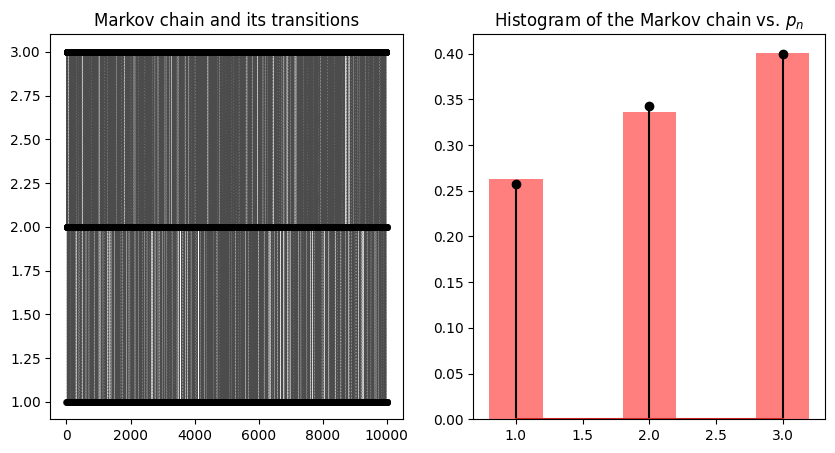

In [3]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.default_rng(42)

def discrete(s, w):
    cw = np.cumsum(w)
    u = rng.uniform(0, 1)

    for i in range(len(cw)):
        if cw[i] >= u:
            return s[i]


M = [[0.6, 0.2, 0.2], [0.3, 0.5, 0.2], [0, 0.3, 0.7]]


def sample_Markov_chain(s, M, s_curr):
    return discrete(s, M[s_curr])


s = [0, 1, 2]

N = 10000

seq = np.zeros(N, dtype=int)
seq[0] = 0

p = np.zeros((3, N))
p[:, 0] = [1, 0, 0]

fig = plt.figure(figsize=(10, 5))

for n in range(1, N):
    seq[n] = sample_Markov_chain(s, M, seq[n - 1])
    p[:, n] = p[:, n - 1] @ M


plt.subplot(1, 2, 1)
plt.plot(seq[:N-1] + 1, 'ko--', markersize=4, linewidth=0.2, alpha=0.7)
plt.title('Markov chain and its transitions')
plt.subplot(1, 2, 2)
plt.hist(seq[:N-1] + 1, bins=[1, 2, 3, 4], density=True, rwidth=0.4, color='r', alpha=0.5, align='left')
plt.stem([1, 2, 3], p[:, N-1], markerfmt='o', linefmt='k-')
plt.title('Histogram of the Markov chain vs. $p_n$')
plt.show()
